In [308]:
# Nighttime Vehicle Detection - OpenCV, C++, Image processing
# Receiver module in Nokia BTS - Embedded C, telecommunications standards
# Printer Management System (~3 years) - Linux system programming, UI, Network interface, encryption
# WebAPI development (~6months) - web technologies, nodejs, REST API
# Simulator tools - C/C++, Integration to internal test automation framework

# Python setup
# Turn on Camera
# Empty board calibration (find corners)
# Start game (capture photo)
# Infer piece positions per row
# Compare board states
# Determine the move made
# Record the move
# Proceed with next turn until game over

# Environment setup
# Install 3rd-party Python Modules
!pip install cairosvg

# Configure matplotlib
%matplotlib inline
from matplotlib import pyplot as plt

# Mount Google Drive to Colab VM
# Current location: /gdrive/My Drive/Colab Notebooks/project-checkmate/
from google.colab import drive
drive.mount('/gdrive')

import chess
import chess.pgn
import chess.svg
import numpy as np

# Utility class
# Generalized image display function
def display_image(img):
  if img.ndim == 2:
    print("Displaying Grayscale image:")
    plt.imshow(img, cmap='gray')
  else:
    print("Displaying Color image:")
    plt.imshow(img)
  plt.show()

# ChessGame class
print("project-checkmate v0.01")
board = chess.Board()
game = chess.pgn.Game()
game.headers["Event"] = "Event"
game.headers["Site"] = "Site"
game.headers["Date"] = "Date"
game.headers["Round"] = "Round #"
game.headers["White"] = "White"
game.headers["Black"] = "Black"

# Global variables
isStartOfGame = True
node = 0

# Populate by row from White side as 1st row
initial_state = np.array([[ 1,  1,  1,  1,  1,  1,  1,  1],
                          [ 1,  1,  1,  1,  1,  1,  1,  1],
                          [ 0,  0,  0,  0,  0,  0,  0,  0],
                          [ 0,  0,  0,  0,  0,  0,  0,  0],
                          [ 0,  0,  0,  0,  0,  0,  0,  0],
                          [ 0,  0,  0,  0,  0,  0,  0,  0],
                          [-1, -1, -1, -1, -1, -1, -1, -1],
                          [-1, -1, -1, -1, -1, -1, -1, -1]])
# For visualization only
#print(np.flip(initial_state, axis=0))

# Should be from BoardState class
def getBoardStateDiff(current_state, prev_state):
  global board
  state_diff = current_state - prev_state
  if board.turn == chess.BLACK:
    state_diff = -state_diff
  return state_diff

def getStartSquare(state_diff):
  start_point = np.unravel_index(state_diff.argmin(), state_diff.shape)
  print(start_point)
  start_square = chess.square(start_point[1], start_point[0])
  print(start_square)
  print(chess.square_name(start_square))
  return start_square

def getDestSquare(state_diff):
  dest_point = np.unravel_index(state_diff.argmax(), state_diff.shape)
  print(dest_point)
  dest_square = chess.square(dest_point[1], dest_point[0])
  print(chess.square_name(dest_square))
  return dest_square

def getMove(start_square, dest_square):
  move = chess.Move(start_square, dest_square)
  uci_move = chess.Move.uci(move)
  print("UCI move = " + uci_move)
  san_move = board.san(move)
  print("SAN move = " + san_move)
  return move

def executeMove(move):
  global isStartOfGame
  global node
  if isStartOfGame:
    node = game.add_variation(move)
    isStartOfGame = False
  else:
    node = node.add_variation(move)
  board.push(move)

# White's turn
print("Turn = " + str(board.turn))

# Move 1
prev_state = initial_state
# Sample move of White, populate by row from White side as 1st row
# Below is d2d4 move
# Should be from BoardState class
current_state = np.array([[ 1,  1,  1,  1,  1,  1,  1,  1],
                          [ 1,  1,  1,  0,  1,  1,  1,  1],
                          [ 0,  0,  0,  0,  0,  0,  0,  0],
                          [ 0,  0,  0,  1,  0,  0,  0,  0],
                          [ 0,  0,  0,  0,  0,  0,  0,  0],
                          [ 0,  0,  0,  0,  0,  0,  0,  0],
                          [-1, -1, -1, -1, -1, -1, -1, -1],
                          [-1, -1, -1, -1, -1, -1, -1, -1]])
# For visualization only
#print(np.flip(current_state, axis=0))

state_diff = getBoardStateDiff(current_state, prev_state)
start_square = getStartSquare(state_diff)
dest_square = getDestSquare(state_diff)
move = getMove(start_square, dest_square)
executeMove(move)
print("Turn = " + str(board.turn))

# Move 2
prev_state = current_state
# Sample move of White, populate by row from White side as 1st row
# Below is Nc6 move
current_state = np.array([[ 1,  1,  1,  1,  1,  1,  1,  1],
                          [ 1,  1,  1,  0,  1,  1,  1,  1],
                          [ 0,  0,  0,  0,  0,  0,  0,  0],
                          [ 0,  0,  0,  1,  0,  0,  0,  0],
                          [ 0,  0,  0,  0,  0,  0,  0,  0],
                          [ 0,  0, -1,  0,  0,  0,  0,  0],
                          [-1, -1, -1, -1, -1, -1, -1, -1],
                          [-1,  0, -1, -1, -1, -1, -1, -1]])
# For visualization only
#print(np.flip(current_state, axis=0))

state_diff = getBoardStateDiff(current_state, prev_state)
start_square = getStartSquare(state_diff)
dest_square = getDestSquare(state_diff)
move = getMove(start_square, dest_square)
executeMove(move)
print("Turn = " + str(board.turn))

Drive already mounted at /gdrive; to attempt to forcibly remount, call drive.mount("/gdrive", force_remount=True).
project-checkmate v0.01
Turn = True
(1, 3)
11
d2
(3, 3)
d4
UCI move = d2d4
SAN move = d4
Turn = False
(7, 1)
57
b8
(5, 2)
c6
UCI move = b8c6
SAN move = Nc6
Turn = True


In [309]:
# https://stackoverflow.com/questions/62329331/load-svg-image-in-opencv
from cairosvg import svg2png
from io import BytesIO
from PIL import Image
import cv2

# Tools class
def chessSVGBoardToNumpyArray(board):
  # Convert chess.svg to PNG format
  board_png = svg2png(bytestring=chess.svg.board(board))

  # Read PNG image as RGBA color space
  pil_img = Image.open(BytesIO(board_png)).convert('RGBA')

  # Convert RGBA to BGRA to follow OpenCV convention
  cv_img = cv2.cvtColor(np.array(pil_img), cv2.COLOR_RGBA2BGRA)
  return cv_img

#cv_img = chessSVGBoardToNumpyArray(board)
cv_img = cv2.imread('/gdrive/My Drive/Colab Notebooks/project-checkmate/chess-board-32.jpg')
print(cv_img.shape)

#cv2.imwrite('/gdrive/My Drive/Colab Notebooks/project-checkmate/board.png', cv_img)

(2448, 2448, 3)


True
(49, 2)
dx = 
472.5865
1973.0415
250.07584635416666
dy = 
468.017
1971.7773
250.6267293294271
++
[[ 222.51  217.39]
 [2223.12  217.39]
 [ 222.51 2222.4 ]
 [2223.12 2222.4 ]]
Displaying Color image:


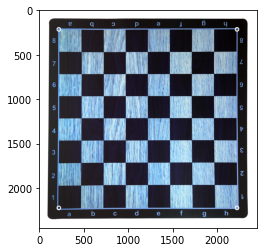

In [310]:
# (temp only) Generate Chess board without pieces
#empty_board = chessSVGBoardToNumpyArray(chess.Board(None))
empty_board = cv_img

# Locate inner corners
retval, inner_corners = cv2.findChessboardCorners(empty_board, (7, 7));
print(retval)

radius = 20          # Radius of circle
color = (255, 255, 255) # Blue color in BGR
thickness = 10       # Line thickness of 2 px

# Draw points on the inner corners
inner_corners = inner_corners[:, 0, :]
inner_corners = inner_corners[np.lexsort((inner_corners[:, 1], inner_corners[:, 0]))]
print(inner_corners.shape)

#for c in range(0, len(inner_corners)):  
#  inner_corner = inner_corners[c, :, :][0]
  #empty_board = cv2.circle(empty_board, (inner_corner[0], inner_corner[1]), radius, color, thickness) 

#print(inner_corners)
print("dx = ")
print(np.min(inner_corners[:, 0]))
print(np.max(inner_corners[:, 0]))
print((np.max(inner_corners[:, 0]) - np.min(inner_corners[:, 0]))/6.0)
dx = (np.max(inner_corners[:, 0]) - np.min(inner_corners[:, 0]))/6.0
print("dy = ")
print(np.min(inner_corners[:, 1]))
print(np.max(inner_corners[:, 1]))
print((np.max(inner_corners[:, 1]) - np.min(inner_corners[:, 1]))/6.0)
dy = (np.max(inner_corners[:, 1]) - np.min(inner_corners[:, 1]))/6.0

# Estimate the four outermost corners (simple method)
# top left
four_corners = np.array([np.round(np.float32([np.min(inner_corners[:, 0]) - dx, np.min(inner_corners[:, 1]) - dy]), 2)])
four_corners = np.append(four_corners, np.array([np.round(np.float32([np.max(inner_corners[:, 0]) + dx, np.min(inner_corners[:, 1]) - dy]), 2)]), axis=0)
four_corners = np.append(four_corners, np.array([np.round(np.float32([np.min(inner_corners[:, 0]) - dx, np.max(inner_corners[:, 1]) + dy]), 2)]), axis=0)
four_corners = np.append(four_corners, np.array([np.round(np.float32([np.max(inner_corners[:, 0]) + dx, np.max(inner_corners[:, 1]) + dy]), 2)]), axis=0)
print("++")
print(four_corners)
for c in range(0, len(four_corners)):
  corner = four_corners[c]
  empty_board = cv2.circle(empty_board, (corner[0], corner[1]), radius, color, thickness)
#four_corners = np.append(four_corners, np.round(np.float32(np.min(inner_corners[:, 0]) - dx), 2), np.round(np.float32(np.min(inner_corners[:, 1]) - dy), 2), axis=0)
#print([np.min(inner_corners[:, 0]) - dx, np.min(inner_corners[:, 1]) - dy])

# top right
#four_corners = np.append(np.round(np.float32(np.max(inner_corners[:, 0]) + dx), 2), np.round(np.float32(np.min(inner_corners[:, 1]) - dy), 2), axis=0)
#print([np.max(inner_corners[:, 0]) + dx, np.min(inner_corners[:, 1]) - dy])

# bottom left
#four_corners = np.append(np.round(np.float32(np.min(inner_corners[:, 0]) - dx), 2), np.round(np.float32(np.max(inner_corners[:, 1]) + dy), 2), axis=0)
#print([np.min(inner_corners[:, 0]) - dx, np.max(inner_corners[:, 1]) + dy])

# bottom right
#four_corners = np.append(np.round(np.float32(np.max(inner_corners[:, 0]) + dx), 2), np.round(np.float32(np.max(inner_corners[:, 1]) + dy), 2), axis=0)
#print([np.max(inner_corners[:, 0]) + dx, np.max(inner_corners[:, 1]) + dy])

'''print(inner_corners[0, :, :][0][0])
print(inner_corners[1, :, :][0][0])
d = round(inner_corners[1, :, :][0][0] - inner_corners[0, :, :][0][0])
print(d)
outer_corners = []
# top left
outer_corners += [[inner_corners[0, :, :][0][0] - d, inner_corners[0, :, :][0][1] - d]]
# top right
outer_corners += [[inner_corners[6, :, :][0][0] + d, inner_corners[6, :, :][0][1] - d]]
# bottom left
outer_corners += [[inner_corners[42, :, :][0][0] - d, inner_corners[42, :, :][0][1] + d]]
# bottom right
outer_corners += [[inner_corners[48, :, :][0][0] + d, inner_corners[48, :, :][0][1] + d]]
outer_corners = np.array(outer_corners)
print(type(outer_corners))
print(outer_corners.shape)
print(len(outer_corners))
print(outer_corners)
for c in range(0, len(outer_corners)):  
  #outer_corner = outer_corners[c, :, :][0]
  outer_corner = outer_corners[c]
  empty_board = cv2.circle(empty_board, (outer_corner[0], outer_corner[1]), radius, color, thickness)
'''

'''
# Calculate outer corners by interpolation
# https://numpy.org/doc/1.18/reference/generated/numpy.interp.html
inner_corners = inner_corners[:, 0, :]
inner_corners = inner_corners[np.lexsort((inner_corners[:, 1], inner_corners[:, 0]))]
print(inner_corners)
print("===============")

# for each column
outer_corners = []
dy = (inner_corners[7, 1] - inner_corners[0, 1])
# for each column
for j in range(0, 7):
  # Treat y-coordinates as independent variable
  x = []
  for i in range(0, len(inner_corners), 7):
    x += [inner_corners[i+j, 1]]
  print("x = ")
  print(x)

  # Treat x-coordinates as dependent variable
  y = []
  for i in range(0, len(inner_corners), 7):
    y += [inner_corners[i+j, 0]]
  print("y = ")
  print(y)
  z = np.polyfit(x, y, 1) # degree = 1 (linear only)
  f = np.poly1d(z) # dimension = 1
  outer_corners += [[f(x[0]  - dy), x[0]  - dy]]
  outer_corners += [[f(x[-1] + dy), x[-1] + dy]]

# for each row = DONE
#dx = round(inner_corners[1, 0] - inner_corners[0, 0])
#print("dx = " + str(dx))
#for i in range(0, len(inner_corners), 7):
  #x = inner_corners[i:i+7, 0]
  ##print(x)
  #y = inner_corners[i:i+7, 1]
  ##print(y)
  #z = np.polyfit(x, y, 1) # degree = 1 (linear only)
  #f = np.poly1d(z) # dimension = 1
  #outer_corners += [[x[0]-dx, f(x[0]-dx)]]
  #outer_corners += [[x[-1]+dx, f(x[-1]+dx)]]

print("outer_corners")
outer_corners = np.round(np.float32(outer_corners), 2)
outer_corners = outer_corners[np.lexsort((outer_corners[:, 1], outer_corners[:, 0]))]
print(type(outer_corners))
#print(outer_corners)
#print(outer_corners[np.lexsort((outer_corners[:, 1], outer_corners[:, 0]))])
#print(outer_corners[:, 1])
for c in range(0, len(outer_corners)):
  outer_corner = outer_corners[c]
  #empty_board = cv2.circle(empty_board, (outer_corner[0], outer_corner[1]), radius, color, thickness)

print("all_corners")
all_corners = np.array([])
all_corners = np.append(np.round(np.float32(inner_corners), 2), np.round(np.float32(outer_corners), 2), axis=0)
all_corners = all_corners[np.lexsort((all_corners[:, 0], all_corners[:, 1]))]
#print(all_corners)
x = all_corners[0:7, 0]
y = all_corners[0:7, 1]
z = np.polyfit(x, y, 1) # degree = 1 (linear only)
f = np.poly1d(z) # dimension = 1
all_corners = np.append(all_corners, np.round(np.float32([[x[0]-dx, f(x[0]-dx)]]), 2), axis=0)
all_corners = np.append(all_corners, np.round(np.float32([[x[-1]+dx, f(x[-1]+dx)]]), 2), axis=0)
all_corners = all_corners[np.lexsort((all_corners[:, 0], all_corners[:, 1]))]

#print(all_corners)

x = all_corners[-7:, 0]
y = all_corners[-7:, 1]
z = np.polyfit(x, y, 1) # degree = 1 (linear only)
f = np.poly1d(z) # dimension = 1
#print([[x[-1]+dx, f(x[-1]+dx)]])
all_corners = np.append(all_corners, np.round(np.float32([[x[0]-dx, f(x[0]-dx)]]), 2), axis=0)
all_corners = np.append(all_corners, np.round(np.float32([[x[-1]+dx, f(x[-1]+dx)]]), 2), axis=0)
all_corners = all_corners[np.lexsort((all_corners[:, 0], all_corners[:, 1]))]

#print(all_corners)
'''

# Extrapolation for outer corners
'''points = np.array([(1, 2), (2, 4), (3, 6)])
x = points[:,0]
y = points[:,1]
z = np.polyfit(x, y, 1) # degree = 1 (linear only)
f = np.poly1d(z) # dimension = 1
y_new = np.round(f([5, -1]))
print(y_new)'''

'''

print(len(all_corners))
for c in range(0, len(all_corners)):
  all_corner = all_corners[c]
  empty_board = cv2.circle(empty_board, (all_corner[0], all_corner[1]), radius, color, thickness)
'''

display_image(empty_board)

In [311]:
a = np.array([[1, 2], [3, 4], [1, 3]])
a[np.argsort(a[:, 1])]

array([[1, 2],
       [1, 3],
       [3, 4]])